# Run this cell to train a new AI


In [3]:
AI_name = "set_name_of_AI"

set_name_of_AI
making the model...
Metal device set to: Apple M2


2023-06-20 12:30:01.547988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-20 12:30:01.548380: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                        

2023-06-20 12:30:02.075881: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-20 12:30:02.339135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 4s 59ms/step - loss: 0.1676 - accuracy: 0.9633 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 2/20
 4/19 [=====>........................] - ETA: 0s - loss: 0.0434 - accuracy: 1.0000

2023-06-20 12:30:06.219557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 23ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 3/20
19/19 [==============================] - 0s 23ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/20
19/19 [==============================] - 0s 24ms/step - loss: 6.1851e-04 - accuracy: 1.0000 - val_loss: 2.0288e-04 - val_accuracy: 1.0000
Epoch 5/20
19/19 [==============================] - 0s 24ms/step - loss: 1.3405e-04 - accuracy: 1.0000 - val_loss: 8.0696e-05 - val_accuracy: 1.0000
Epoch 6/20
19/19 [==============================] - 0s 23ms/step - loss: 7.1792e-05 - accuracy: 1.0000 - val_loss: 5.3308e-05 - val_accuracy: 1.0000
Epoch 7/20
19/19 [==============================] - 0s 24ms/step - loss: 3.6685e-05 - accuracy: 1.0000 - val_loss: 3.9999e-05 - val_accuracy: 1.0000
Epoch 8/20
19/19 [==============================] - 0s 23ms/step - loss: 5.4731e-05 - accuracy: 1.0000 - val_loss: 2.9949e-05 - val_a

INFO:tensorflow:Assets written to: models/savedModels/set_name_of_AI/assets


INFO:tensorflow:Assets written to: models/savedModels/set_name_of_AI/assets


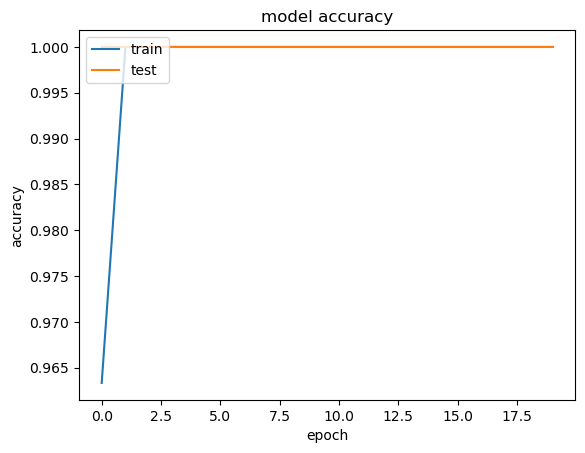

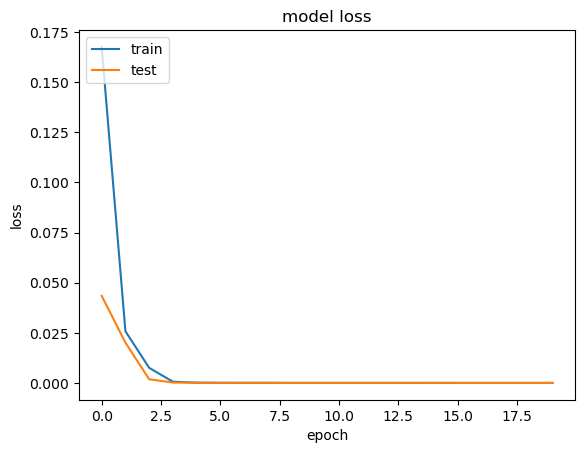

8/8 [==============================] - 0s 10ms/step
Confusion matrix:
[[ 12   0]
 [  0 228]]


2023-06-20 12:30:15.606704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


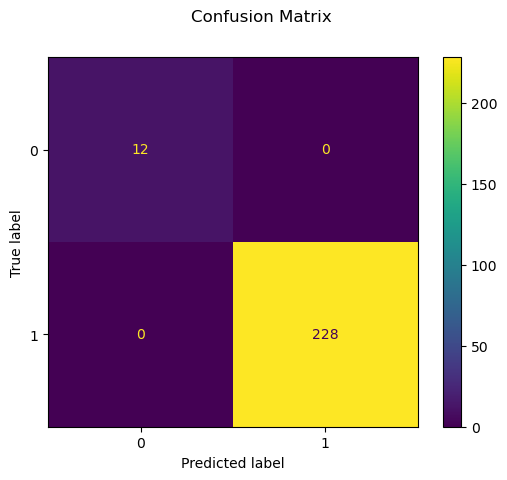

In [4]:
from models.trainModel import run as generate_new_model
from models.CNN.CNNmodel import CNN
different_traning_sizes = [1000]
for i in different_traning_sizes:
    name = AI_name
    print(name)
    generate_new_model(constructor=CNN,
                           name=name, save=True, verbose=True,data_size_cap=i)

# Given an AI find the optimal teaching set

In [6]:
import run
import tensorflow
from TA.subset.try_all import TryAll
from TA.subset.random_w_hash import RandomWHashSelect
from TA.subset.random_select import RandomSelect
from TA.delta.sumOfExamples import SumOfExamples as delta
import time

from utils.global_props import set_e, set_B, set_mu

from models.trainModel import load_model
ai_trails_testing = [load_model(AI_name)] # Load the AI

sampling_attempts = [pow(10,15)] #"infinite"
deltas = [delta()]
sub_set_selectors = [TryAll()]

#different_e_values = range(25,0,-1)
#different_B_values = list(range(0,9))
different_mu_values = [1000000]#[0.1,1,10,11,12,13,14,15,16,17,18,19,20,50,100,150,200,300,400,500]



"""
for B in different_B_values:
set_B(B)
for e in different_e_values:
set_e(e)
"""
for mu in different_mu_values:
    print("attempting mu:",mu)
    set_mu(mu)
    run.main_run_system(re_train=False,clean_data=False, deltas=deltas, ai_models=ai_trails_testing,
                         differentNrAttempts=sampling_attempts,subset_selectors=sub_set_selectors, verbose=True)

attempting mu: 1000000
model: set_name_of_AI
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000000000
Start load..
end load
loading probability map...
Done loading probability map!
early return at 16 1
model: set_name_of_AI
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000000000
Start load..
end load
early return at 120 2
model: set_name_of_AI
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000000000
Start load..
end load
early return at 560 3
model: set_name_of_AI
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000000000
Start load..
end load
early return at 1820 4
model: set_name_of_AI
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000000000
Start load..
end load
impossible to find better score. Earl